In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from pathlib import Path
from PIL import Image

import os
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
symbols_list = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']

In [3]:
dataset_path = "./dataset/train"
train_image = []
train_label = []

for symbols_dir in os.listdir(dataset_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(dataset_path + "/" + symbols_dir):
            train_label.append(symbols_dir.split()[0])
            train_image.append(dataset_path + "/" + symbols_dir + "/" + image)

In [4]:
eval_path = "./dataset/eval"
test_image = []
test_label = []

for symbols_dir in os.listdir(eval_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(eval_path + "/" + symbols_dir):
            test_label.append(symbols_dir.split()[0])
            test_image.append(eval_path + "/" + symbols_dir + "/" + image)

In [5]:
print("Length of train_image : " , len(train_image) , " , length of labels list : " ,len(train_label))
print("Length of test_image : " , len(test_image) , " , length of labels list : " ,len(test_label))

Length of train_image :  7557  , length of labels list :  7557
Length of test_image :  1010  , length of labels list :  1010


In [6]:
unique_train = list(set(train_label))
unique_test = list(set(test_label))
print("Length of train unique labels: " , len(unique_train) , " : " , unique_train)
print("Length of test unique labels: " , len(unique_test) , " : " , unique_test)

Length of train unique labels:  16  :  ['eight', 'four', 'minus', 'nine', 'plus', 'five', 'seven', 'six', 'div', 'decimal', 'three', 'times', 'two', 'equal', 'zero', 'one']
Length of test unique labels:  16  :  ['eight', 'four', 'minus', 'nine', 'plus', 'five', 'seven', 'six', 'div', 'decimal', 'three', 'times', 'two', 'equal', 'zero', 'one']


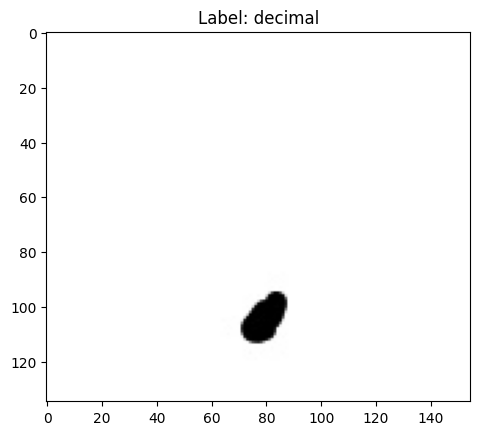

In [19]:
image = cv2.imread(train_image[40])
plt.imshow(image)
plt.title("Label: " + train_label[40])
plt.show()

In [8]:
X_train = []
X_test = []

# laoding the images from the path
for path in train_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    X_train.append(img)

for path in test_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)     
    X_test.append(img)

# creating numpy array from the images
X_train = np.array(X_train)
X_test = np.array(X_test)

In [9]:
# normalizing the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (7557, 100, 100, 3)
X_test shape:  (1010, 100, 100, 3)


In [10]:
# label encoding the 16 symbols
label_encoder = preprocessing.LabelEncoder()
y_train_temp = label_encoder.fit_transform(train_label)
y_test_temp = label_encoder.fit_transform(test_label)

In [11]:
print("y_train_temp shape: ", y_train_temp.shape)
print("y_test_temp shape: ", y_test_temp.shape)

y_train_temp shape:  (7557,)
y_test_temp shape:  (1010,)


In [12]:
# creating matrix labels list
y_train = keras.utils.to_categorical(y_train_temp, 16)
y_test = keras.utils.to_categorical(y_test_temp, 16)


print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (7557, 16)
y_test shape:  (1010, 16)


In [13]:
# using sequential model for training
model = Sequential()

# 1st layer and taking input in this of shape 100x100x3 ->  100 x 100 pixles and 3 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

# maxpooling will take highest value from a filter of 2*2 shape
model.add(MaxPooling2D(pool_size=(2, 2)))

# it will prevent overfitting by making it hard for the model to idenify the images
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

# last layer predicts 16 labels
model.add(Dense(16, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

c:\Users\Aniket kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,408,560 (66.41 MB)

 Trainable params: 17,408,560 (66.41 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# displaying the model
keras.utils.plot_model(model, "model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [15]:
# training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=50,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 115s 923ms/step - accuracy: 0.2275 - loss: 2.5437 - val_accuracy: 0.0437 - val_loss: 10.9377
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 103s 855ms/step - accuracy: 0.7512 - loss: 0.7606 - val_accuracy: 0.0582 - val_loss: 11.3924
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 54s 448ms/step - accuracy: 0.8631 - loss: 0.4194 - val_accuracy: 0.0556 - val_loss: 18.8097
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 110s 909ms/step - accuracy: 0.9050 - loss: 0.2829 - val_accuracy: 0.0582 - val_loss: 19.1504
Epoch 5/50
 53/121 ━━━━━━━━━━━━━━━━━━━━ 2:00 2s/step - accuracy: 0.9377 - loss: 0.1711

KeyboardInterrupt: 